# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [65]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality
    fig,ax = plt.subplots()
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize': (12,10)})
    sns.histplot(sample, stat="density", ax=ax)
    sns.kdeplot(sample,color="red")
    ax.set_xlim(50,100)
    
    # Population mean 
    print("The population mean is:",popmean)
    
    # Sample mean (x̄) using NumPy mean()
    xbar = sample.mean()
    
    # Sample Standard Deviation (sigma) using Numpy
    s = sample.std(ddof=1)
    
    # Degrees of freedom
    n = len(sample)
    ndof = n-1 
    
    # Calculate the critical t-value
    t_crt = stats.t.ppf(1-alpha,ndof)
    
    # Calculate the t-value and p-value      
    t = (xbar-popmean)/(s/np.sqrt(n))
    p = stats.t.sf(t,ndof)

    # use that other function
    results = stats.ttest_1samp(sample,popmean)
    # return results
    print("the ttest_1samp function gives:",results)
    if t>t_crt:
        print(f"Null hypothesis is rejected. Results are statistically significant with t value {np.round(t,2)} and p value {np.round(p,2)}")
    else:
        print("Null hypothesis is true.")
    return t, t_crt, p

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

C:\Users\setar\anaconda3\envs\my-learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\setar\anaconda3\envs\my-learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\setar\anaconda3\envs\my-learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\setar\anaconda3\envs\my-learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

The population mean is: 65
the ttest_1samp function gives: TtestResult(statistic=12.687592157174493, pvalue=1.0053355594452825e-10, df=19)
Null hypothesis is rejected. Results are statistically significant with t value 12.69 and p value 0.0
6
[84.  92.4 74.3 79.4 86.7 75.3 80.9 86.1 81.  85.1 78.7 73.5 86.9 87.4
 82.7 81.9 69.9 77.2 79.3 83.3]
The population mean is: 65
the ttest_1samp function gives: TtestResult(statistic=13.202088288314906, pvalue=5.083361606682268e-11, df=19)
Null hypothesis is rejected. Results are statistically significant with t value 13.2 and p value 0.0


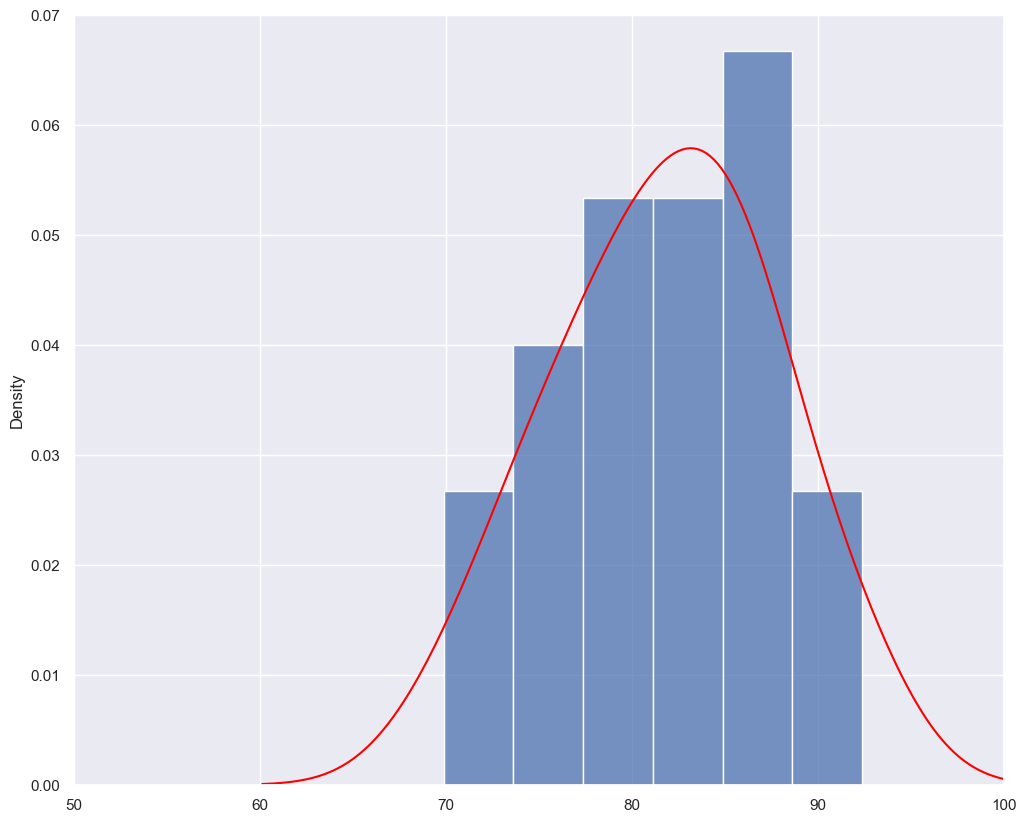

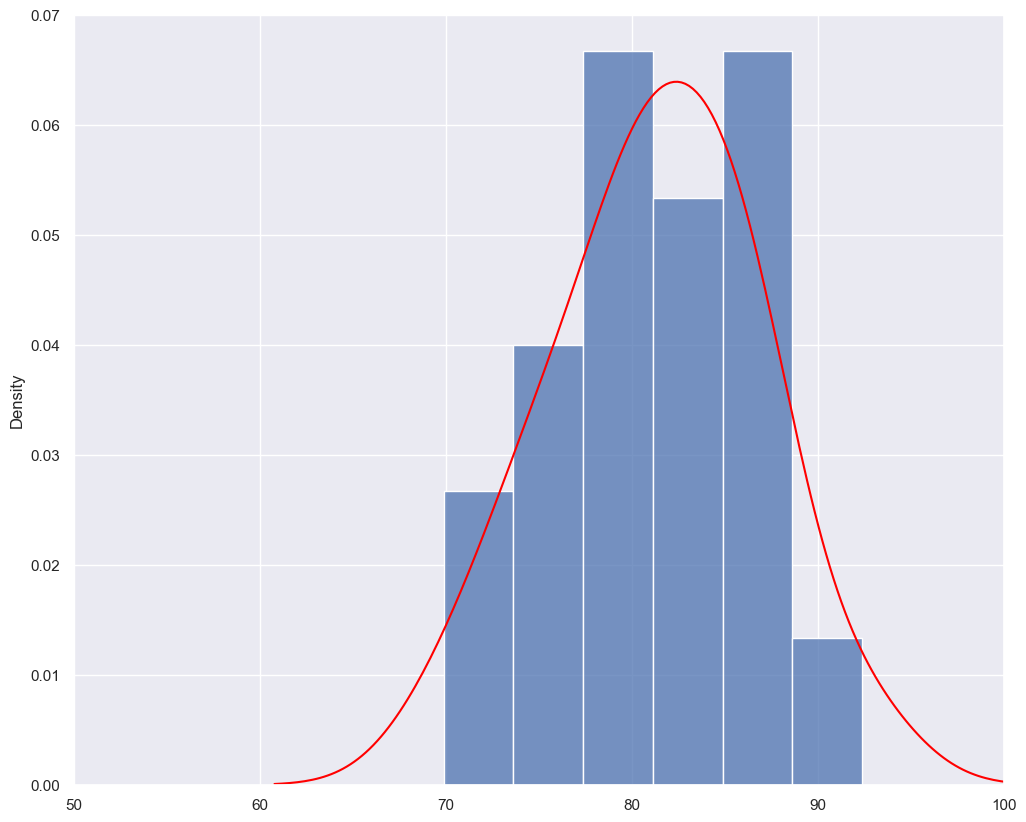

In [66]:
# H0 (Null Hypothesis): the Python course has had no effect, i.e. mu<=65
# H1 (Alternative Hypothesis): the Python course has improved the performance of students. mu>65
# This is a one-tail test
sample_grades = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, \
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
alpha=0.05
t,t_crt,p = one_sample_ttest(sample_grades,65,alpha)

#print(f"t is equal to {t}")
#print(f"critical t value is equal to {t_crt}")

id = list(sample_grades).index(90.9)
print(id)
sample_grades[id]=80.9
print(sample_grades)
t,t_crt,p = one_sample_ttest(sample_grades,65,alpha)

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 